#### descriptive statistics is used to summarize the numeric data of each individual numeric feature and get various details and informations from its distribution
#### mean etc are measures of data in the descriptive stats , they are divided into three groups
##### first order measures : mean , median , mode also known as central tendencies , they tell information about centre of data
##### second order measures : std deviation and variance ,range , coefficient of range , IQR they tell information about the spread of data
##### third order measures : skewness and kurtosis , they tell information about data distribution
#### togehterly they are used to compare two  numeric features , no restrictions on integer and floating point data both are calculated and operated in above process by the same way only , no restrictions on scaling i.e. any number of rows of data can be used having any min,max value, but the numeric features can be transformed before these calculations using sklearn transformers if we wish
#### Probability is never included nor required in these descriptive stats concepts

### READ FROM MAM'S PPTS ABOUT ALL ABOVE CONTENT AND HOW THEY ARE CALCULATED AND WHAT IS SIGNIFICANCE OF EACH MEASURE

#### Concept of Moments : these are specific measures calculated sequentially one by one, either for population or sample on our wish, there is no specific purpose of making this seprate concept,idea is just that these few measures can be calculated consecutively and they are most useful for other predictions and applications
##### Step 1 : calculate mean (also known as first order moment)
##### Step 2 : calculate std-deviation and variance(also known as second order moment)
##### Step 3 : calculate skewness (also known as third order moment) using third order moment forumla
##### Step 4 : calculate kurtosis (also known as fourth order moment) using fourth order moment formula
#### NOTE : kurtosis : it gives measure of fatness of tail of a distribution,more fatness more are outliers , in many places people wrongly say kurtosis is measure of peakedness of distribution , but it is not correct
#### below are formulas for sample

#### 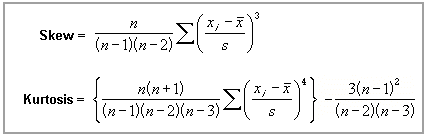

##### here is just their coded implementation using inbuilt library functions of numpy ,pandas and scipy , we cant apply thier methods on list tuples,we need numpy arrays or pandas dataframes series only

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
df=df[20:60]
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
20,male,group D,high school,standard,none,66,69,63
21,female,group B,some college,free/reduced,completed,65,75,70
22,male,group D,some college,standard,none,44,54,53
23,female,group C,some high school,standard,none,69,73,73
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


In [3]:
var1=df['math score']

### calculating first order measures

In [4]:
np.mean(var1)

62.2

In [5]:
np.median(var1)

64.0

In [6]:
from collections import Counter
Counter(var1)
#mode is 65 with 36 occurences

Counter({66: 2,
         65: 2,
         44: 1,
         69: 3,
         74: 2,
         73: 1,
         67: 1,
         70: 1,
         62: 1,
         63: 1,
         56: 1,
         40: 1,
         97: 1,
         81: 1,
         50: 2,
         75: 1,
         57: 2,
         55: 2,
         58: 2,
         53: 3,
         59: 1,
         82: 2,
         77: 1,
         88: 1,
         71: 1,
         33: 1,
         52: 1,
         0: 1})

### calculating second order measures
###### standard deviation and variance

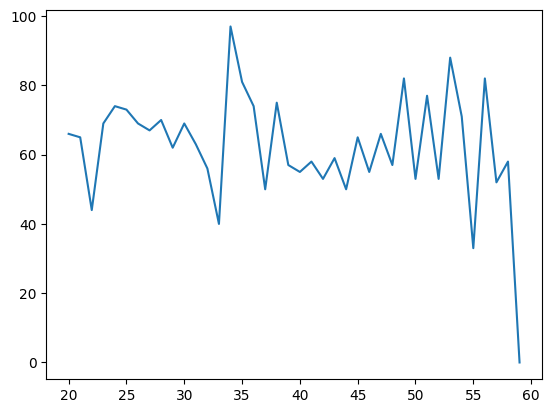

In [7]:
plt.plot(var1)

In [8]:
np.std(var1)

16.26376340211576

In [9]:
np.var(var1)

264.51000000000005

##### range and coefficient of range

In [10]:
range1=max(var1)-min(var1)
range1

97

In [11]:
coefrange1=(max(var1)-min(var1))/(max(var1)+min(var1))
coefrange1

1.0

##### IQR calculation and boxplot

In [12]:
var1.describe()#five number summary

count    40.000000
mean     62.200000
std      16.470953
min       0.000000
25%      54.500000
50%      64.000000
75%      71.500000
max      97.000000
Name: math score, dtype: float64

In [13]:
IQR1=np.percentile(var1,75)-np.percentile(var1,25)
IQR1

17.0

<Axes: >

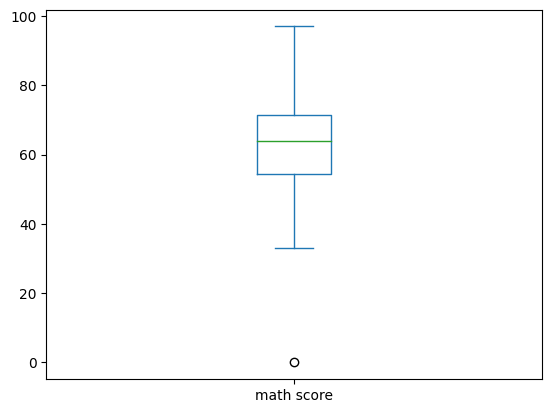

In [14]:
var1.plot(kind='box')

### calculating third order measures

###### skewness using pearson second coefficient : no inbuilt library function for this , we need to write manual code for it as below using scipy , but it is not useful

In [15]:
from scipy import stats

def pearson_second_coeff(data):
    mean = np.mean(data)
    mode = stats.mode(data)[0][0]
    std_dev = np.std(data)
    return 3 * (mean - mode) / std_dev

In [16]:
skewness1=pearson_second_coeff(var1)
skewness1

C:\Users\Admin\AppData\Local\Temp\ipykernel_7812\1390043664.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(data)[0][0]


1.697024195298458

##### skewness is calculated as third order moment using pandas skew function : this is used

In [17]:
var1.skew()

-1.1914324085696284

##### see the diffirence in above values , the correct value is the -1.19 calculated using skew() function

##### Fischer kurtosis of variable

In [18]:
from scipy.stats import kurtosis
kurtosis(var1)#Fischer kurtosis

3.653127189966477

#### BINNING techniques
##### i) equal width binning : two ways given below

In [20]:
np.histogram(var1,bins=10)

(array([ 1,  0,  0,  1,  2, 13,  8, 10,  3,  2], dtype=int64),
 array([ 0. ,  9.7, 19.4, 29.1, 38.8, 48.5, 58.2, 67.9, 77.6, 87.3, 97. ]))

In [24]:
pd.cut(var1,bins=10).value_counts(sort=False)

(-0.097, 9.7]     1
(9.7, 19.4]       0
(19.4, 29.1]      0
(29.1, 38.8]      1
(38.8, 48.5]      2
(48.5, 58.2]     13
(58.2, 67.9]      8
(67.9, 77.6]     10
(77.6, 87.3]      3
(87.3, 97.0]      2
Name: math score, dtype: int64

##### ii) equal frequency binning : no way manual implementation required